In [1]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import marsilea as ma
import marsilea.plotter as mp
import scienceplots
import pingouin as pg
import pickle
plt.style.use(['science', 'nature'])
from matplotlib.patches import Ellipse
import numpy as np
from scipy.stats import chi2
from itertools import combinations, product

In [2]:
tool_map = {
    "scapa": "scAPA",
    "scapatrap": "scAPAtrap",
    "sierra": "Sierra",
    "maaper": "MAAPER",
    "scapture": "SCAPTURE",
    "scape": "SCAPE",
    "infernape": "Infernape",
}

protocol_map = {
    "Visium": "10X Visium",
    "VisiumHD": "10X Visium HD",
    "Chromium": "10X Chromium",
    "Dropseq": "Drop-seq",
    "Stereoseq": "Stereo-seq",
    "Slideseq": "Slide-seq V2",
    "SpatialTranscriptomics": "ST",
    "Microwell": "Microwell-seq",
}

protocol_order = ["10X Chromium", "Drop-seq", "Microwell-seq", "10X Visium","Stereo-seq", "Slide-seq V2", "ST"]
# tool_order = ["scAPA", "scAPAtrap", "Sierra", "SCAPTURE", "SCAPE", "Infernape"]
tool_order = ["SCAPE", "scAPAtrap", "Infernape",  "scAPA", "SCAPTURE", "Sierra"]
# order = ["10X Chromium", "Drop-seq", "Microwell-seq", "10X Visium", "10X Visium HD","Stereo-seq", "Slide-seq V2", "Spatial Transcriptomics"]

color = [
    "#386b98",
    "#269a51",
    "#edaa4d",
    "#d34123",
    "#7e648a",
    "#454545",
    "#929292",
]
st_remap = {
    "10X Chromium": "10X Chromium",
    "Drop-seq": "Drop-seq",
    "Microwell-seq": "Microwell-seq",
    "10X Visium": "10X Visium",
    "Stereo-seq": "Stereo-seq",
    "Slide-seq V2": "Slide-seq V2",
    "Spatial Transcriptomics": "ST",
}
palette=sns.color_palette(color, 7)
mm = 1/25.4

In [3]:
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.rcParams['axes.labelsize'] = 6
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.right"] = False
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["legend.fontsize"] = 5
plt.rcParams['hatch.linewidth'] = 0.5

In [4]:
with open("/root/apabenchmark/data/performance/performance_merged.pkl", "rb") as f:
    performance_df = pickle.load(f)
performance_df["tool"] = performance_df["tool"].map(tool_map)
performance_df["tool"] = pd.Categorical(performance_df["tool"], categories=tool_order, ordered=True)
performance_df["protocol"] = performance_df["protocol"].map(st_remap)
performance_df["protocol"] = pd.Categorical(performance_df["protocol"], categories=protocol_order, ordered=True)
performance_df["mean_corr"] = performance_df[["pdui", "rdui", "dwui","rwui"]].mean(axis=1)
performance_df["ajusted_pdui"] = performance_df["pdui"] - performance_df["mean_corr"]
performance_df["ajusted_rdui"] = performance_df["rdui"] - performance_df["mean_corr"]
performance_df["ajusted_dwui"] = performance_df["dwui"] - performance_df["mean_corr"]
performance_df["ajusted_rwui"] = performance_df["rwui"] - performance_df["mean_corr"]
performance_df["mean_grouped_corr"] = performance_df[["grouped_pdui", "grouped_rdui", "grouped_dwui","grouped_rwui"]].mean(axis=1)
performance_df["ajusted_grouped_pdui"] = performance_df["grouped_pdui"] - performance_df["mean_corr"]
performance_df["ajusted_grouped_rdui"] = performance_df["grouped_rdui"] - performance_df["mean_corr"]
performance_df["ajusted_grouped_dwui"] = performance_df["grouped_dwui"] - performance_df["mean_corr"]
performance_df["ajusted_grouped_rwui"] = performance_df["grouped_rwui"] - performance_df["mean_corr"]

In [5]:
performance_final_df = performance_df.copy()

In [6]:
performance_final_df = performance_df.copy()
col_map = {
    "jaccard_te": "Jaccard Index (TE)",
    "jaccard_pas": "Jaccard Index (PAS)", 
    "f1_te": "F1 Score (TE)",
    "f1_pas": "F1 Score (PAS)",
    "precision_te": "Precision (TE)",
    "precision_pas": "Precision (PAS)",
    "recall_te": "Recall (TE)",
    "recall_pas": "Recall (PAS)",
    "pct_fp": "FP reads (%)",
    "pearson_pas_counts" : "Pearson correlation of PAS expression (cell level)",
    "grouped_pearson_pas_counts" : "Pearson correlation of PAS expression (cell type level)",
    "pdui" : "Pearson correlation of PDUI (cell level)",
    "rdui" : "Pearson correlation of RDUI (cell level)",
    "dwui" : "Pearson correlation of DWUI (cell level)",
    "rwui" : "Pearson correlation of RWUI (cell level)",
    "grouped_pdui" : "Pearson correlation of PDUI (cell type level)",
    "grouped_rdui" : "Pearson correlation of RDUI (cell type level)",
    "grouped_dwui" : "Pearson correlation of DWUI (cell type level)",
    "grouped_rwui" : "Pearson correlation of RWUI (cell type level)",
    "match_type": "match_type",
    "tool": "tool",
    "protocol": "protocol",
}
match_strategies_mapping = {
    "tmap_rough": "TE loose match",
    "all_match_100_rough": "PAS loose match",
    "tmap_precise": "TE strict match",
    "all_match_100_precise": "PAS strict match",
}

suppfig1_list = ["Precision (PAS)", "Precision (TE)", "Recall (PAS)", "Recall (TE)", "F1 Score (PAS)", "F1 Score (TE)", "Jaccard Index (PAS)", "Jaccard Index (TE)","FP reads (%)"]
suppfig2_list = ["Pearson correlation of PAS expression (cell level)", "Pearson correlation of PAS expression (cell type level)"]
suppfig3_list = ["Pearson correlation of PDUI (cell level)", "Pearson correlation of RDUI (cell level)", "Pearson correlation of RWUI (cell level)","Pearson correlation of DWUI (cell level)", ]
suppfig4_list = ["Pearson correlation of PDUI (cell type level)", "Pearson correlation of RDUI (cell type level)", "Pearson correlation of RWUI (cell type level)","Pearson correlation of DWUI (cell type level)", ]

match_strategy_labels = ["TE loose match", "PAS loose match", "TE strict match", "PAS strict match"]
performance_final_df = performance_final_df.rename(columns=col_map)
performance_final_df = performance_final_df.loc[:,list(col_map.values())]
performance_final_df["match_type"] = performance_final_df["match_type"].map(match_strategies_mapping)
performance_final_df = performance_final_df[performance_final_df["match_type"].isin(match_strategy_labels)]

performance_final_df.loc[performance_final_df["match_type"].isin(["TE loose match", "TE strict match"]), ["Precision (PAS)"]] = np.nan
performance_final_df.loc[performance_final_df["match_type"].isin(["TE loose match", "TE strict match"]), ["Recall (PAS)"]] = np.nan
performance_final_df.loc[performance_final_df["match_type"].isin(["TE loose match", "TE strict match"]), ["F1 Score (PAS)"]] = np.nan
performance_final_df.loc[performance_final_df["match_type"].isin(["TE loose match", "TE strict match"]), ["Jaccard Index (PAS)"]] = np.nan

/tmp/ipykernel_1515839/3769820774.py:6: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(
/tmp/ipykernel_1515839/3769820774.py:6: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(
/tmp/ipykernel_1515839/3769820774.py:6: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(
/tmp/ipykernel_1515839/3769820774.py:6: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(
/tmp/ipykernel_1515839/3769820774.py:6: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(
/tmp/ipykernel_1515839/3769820774.py:6: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(
/tmp/ipykernel_1515839/3769820774.py:6: UserWarning: The palette list has more values (7) than needed (4),

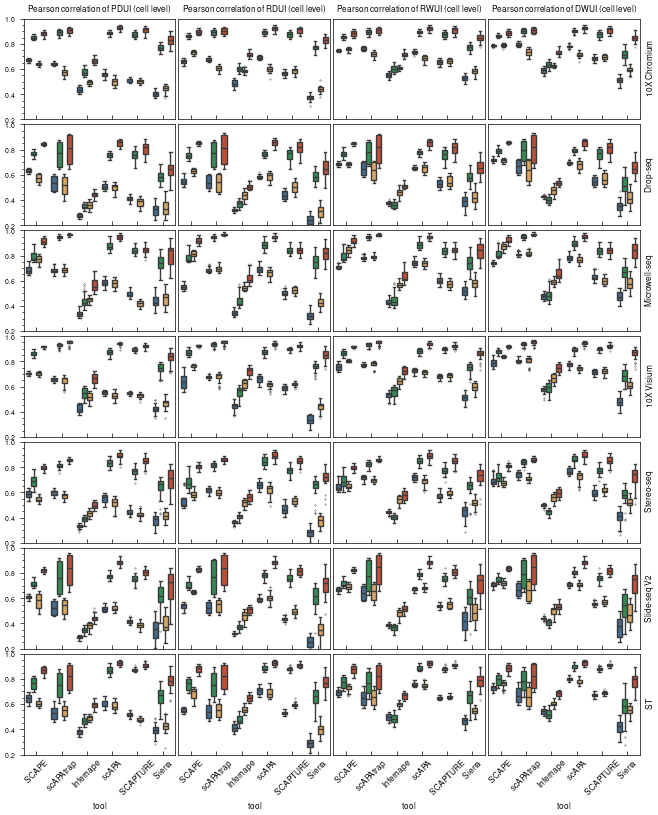

In [8]:
fig, axs = plt.subplots(nrows=7, ncols=4, figsize=(170*mm, 210*mm))
metric_list = suppfig3_list
for i, protocol in enumerate(protocol_order):
    for j, metric in enumerate(metric_list):
        ax = axs[i,j]
        sns.boxplot(
            data=performance_final_df[(performance_final_df["protocol"]==protocol)],
            x="tool",
            y=metric,
            ax=ax,
            order=tool_order,
            hue="match_type",
            palette=palette,
            legend=False,
            fliersize=0.3
            )
        ax.set_ylabel("")
        ax.set_ylim(0.2, 1)
        ax.tick_params(which="minor", bottom=False)
        ax.tick_params(axis="y", which="both",direction="out")
        if i == 0:
            ax.set_title(metric, fontsize=6)
        if i == len(protocol_order)-1:
            ax.set_xticklabels(tool_order, fontsize=6, rotation=45)
            
        else:
            ax.set_xlabel("")
            ax.set_xticklabels([])
            ax.set_ylabel("")
            # move y label to right

        if j > 0:
            ax.set_yticklabels([])
            ax.set_yticks([])
            
            ax.yaxis.set_label_position("right")
        if j == len(metric_list)-1:
            ax.set_ylabel(protocol)
        

plt.tight_layout()
plt.subplots_adjust(wspace=0.02, hspace=0.05)